# Validación con Imágenes Sintéticas

**Universidad Nacional de Colombia**  
**Visión por Computador**  
**Trabajo 2: Registro de Imágenes**

---

- Generar imágenes sintéticas con transformaciones conocidas
- Aplicar el algoritmo de registro
- Recuperar las transformaciones y compararlas con el ground truth
- Calcular métricas de error (RMSE, error angular)
- Validar la precisión del método antes de aplicarlo a imágenes reales

In [18]:
# Importar librerías
import sys
sys.path.append('../src')

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os

# Importar módulos del proyecto
from feature_detection import detect_sift_features
from matching import match_features
from registration import estimate_homography, warp_image
from utils import (
    generate_synthetic_image,
    compute_registration_metrics,
    visualize_registration,
    plot_metrics_table
)

# Configuración
plt.rcParams['figure.figsize'] = (15, 10)

## 1. Cargar Imagen Base

Se puede usar una de las imágenes reales como base para generar sintéticas o generar imágenes sintéticas desde cero.

✓ Imagen base cargada: IMG01.jpg
  Dimensiones: 741x988


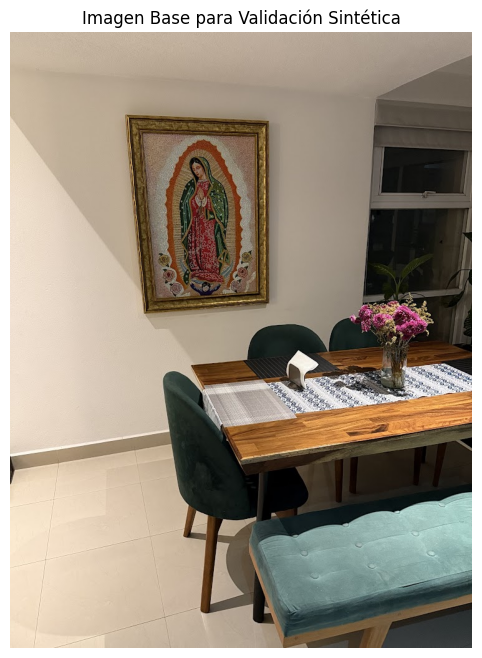

In [19]:
# Cargar imagen base
img_base_path = '../data/original'  # Ajustar según disponibilidad
base_images = list(Path(img_base_path).glob('*.jpg')) + list(Path(img_base_path).glob('*.png'))

if len(base_images) > 0:
    img_base = cv2.imread(str(base_images[0]))
    print(f"✓ Imagen base cargada: {base_images[0].name}")
    print(f"  Dimensiones: {img_base.shape[1]}x{img_base.shape[0]}")
    
    # Visualizar
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(img_base, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Base para Validación Sintética')
    plt.axis('off')
    plt.show()
else:
    # Crear imagen sintética simple si no hay imágenes
    print("⚠ No hay imágenes en data/original. Creando imagen de prueba...")
    img_base= np.zeros((400, 400), dtype=np.uint8)
    cv2.circle(img_base, (200, 200), 80, 255, -1)
    cv2.line(img_base, (50, 50), (350, 350), 255, 3)
    cv2.rectangle(img_base, (100, 300), (300, 350), 255, -1)
    cv2.putText(img_base, "TEST", (120, 120), cv2.FONT_HERSHEY_SIMPLEX, 1.3, 255, 2)

## 2. Generar Imágenes Sintéticas

Aplicamos transformaciones conocidas: rotación, traslación, escala.

In [20]:
# Definir transformaciones a probar
transformations = [
    {'name': 'Rotación 15°', 'rotation': 15, 'translation': (0, 0), 'scale': 1.0},
    {'name': 'Rotación 30°', 'rotation': 30, 'translation': (0, 0), 'scale': 1.0},
    {'name': 'Traslación (50, 30)', 'rotation': 0, 'translation': (50, 30), 'scale': 1.0},
    {'name': 'Escala 1.2x', 'rotation': 0, 'translation': (0, 0), 'scale': 1.2},
    {'name': 'Combinada', 'rotation': 20, 'translation': (40, 20), 'scale': 1.1},
]

# Generar y guardar imágenes sintéticas
synthetic_dir = Path('../data/synthetic')
synthetic_dir.mkdir(exist_ok=True)

synthetic_images = []
ground_truth_matrices = []

for i, transform in enumerate(transformations):
    img_synthetic, H_true = generate_synthetic_image(
        img_base,
        rotation=transform['rotation'],
        translation=transform['translation'],
        scale=transform['scale']
    )
    
    synthetic_images.append((transform['name'], img_synthetic))
    ground_truth_matrices.append(H_true)
    
    # Guardar
    filename = f"synthetic_{i+1:02d}.jpg"
    cv2.imwrite(str(synthetic_dir / filename), img_synthetic)
    print(f"✓ Generada: {transform['name']} -> {filename}")

print(f"\n✓ Total de imágenes sintéticas generadas: {len(synthetic_images)}")

INFO:utils:Imagen sintética generada: rot=15°, trans=(0, 0), scale=1.0
INFO:utils:Imagen sintética generada: rot=30°, trans=(0, 0), scale=1.0
INFO:utils:Imagen sintética generada: rot=0°, trans=(50, 30), scale=1.0
INFO:utils:Imagen sintética generada: rot=0°, trans=(0, 0), scale=1.2
INFO:utils:Imagen sintética generada: rot=20°, trans=(40, 20), scale=1.1


✓ Generada: Rotación 15° -> synthetic_01.jpg
✓ Generada: Rotación 30° -> synthetic_02.jpg
✓ Generada: Traslación (50, 30) -> synthetic_03.jpg
✓ Generada: Escala 1.2x -> synthetic_04.jpg
✓ Generada: Combinada -> synthetic_05.jpg

✓ Total de imágenes sintéticas generadas: 5


## 3. Aplicar Registro y Evaluar

Registramos cada imagen sintética y comparamos con el ground truth.


PROCESANDO: Rotación 15°


INFO:feature_detection:SIFT: Detectados 1549 keypoints
INFO:feature_detection:SIFT: Detectados 2056 keypoints
INFO:matching:Ratio test: 1549 -> 1033 matches
INFO:matching:Emparejamiento completado: 1033 matches (flann)
INFO:registration:Homografía estimada: 1001/1033 inliers (96.9%)


  Keypoints: Base=1549, Sintética=2056
  Matches: 1033
  RMSE: 0.09 píxeles
  Error Angular: 0.01°


INFO:utils:Visualización guardada en: ../results/synthetic_validation/validation_01.png


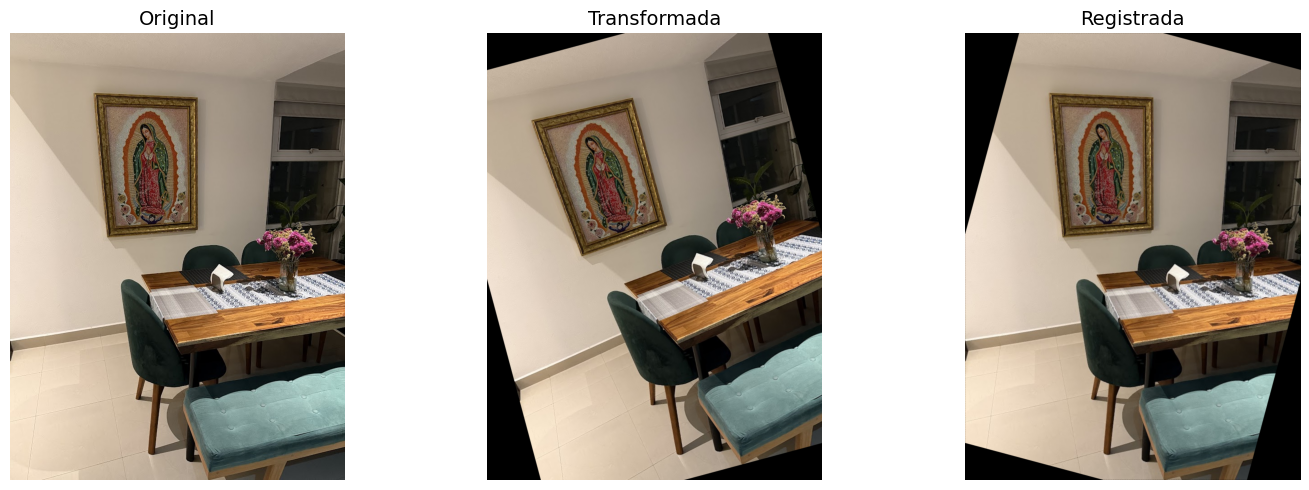

INFO:feature_detection:SIFT: Detectados 1549 keypoints
INFO:feature_detection:SIFT: Detectados 2045 keypoints



PROCESANDO: Rotación 30°


INFO:matching:Ratio test: 1549 -> 1036 matches
INFO:matching:Emparejamiento completado: 1036 matches (flann)
INFO:registration:Homografía estimada: 1015/1036 inliers (98.0%)


  Keypoints: Base=1549, Sintética=2045
  Matches: 1036
  RMSE: 0.18 píxeles
  Error Angular: 0.01°


INFO:utils:Visualización guardada en: ../results/synthetic_validation/validation_02.png


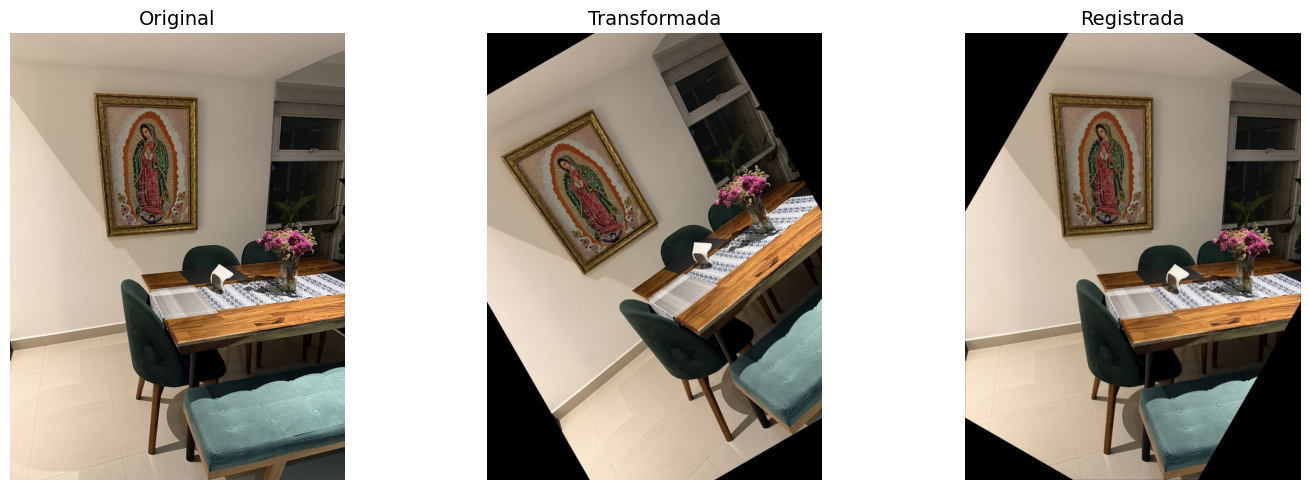

INFO:feature_detection:SIFT: Detectados 1549 keypoints
INFO:feature_detection:SIFT: Detectados 1418 keypoints



PROCESANDO: Traslación (50, 30)
  Keypoints: Base=1549, Sintética=1418


INFO:matching:Ratio test: 1549 -> 1392 matches
INFO:matching:Emparejamiento completado: 1392 matches (flann)
INFO:registration:Homografía estimada: 1388/1392 inliers (99.7%)


  Matches: 1392
  RMSE: 0.04 píxeles
  Error Angular: 0.00°


INFO:utils:Visualización guardada en: ../results/synthetic_validation/validation_03.png


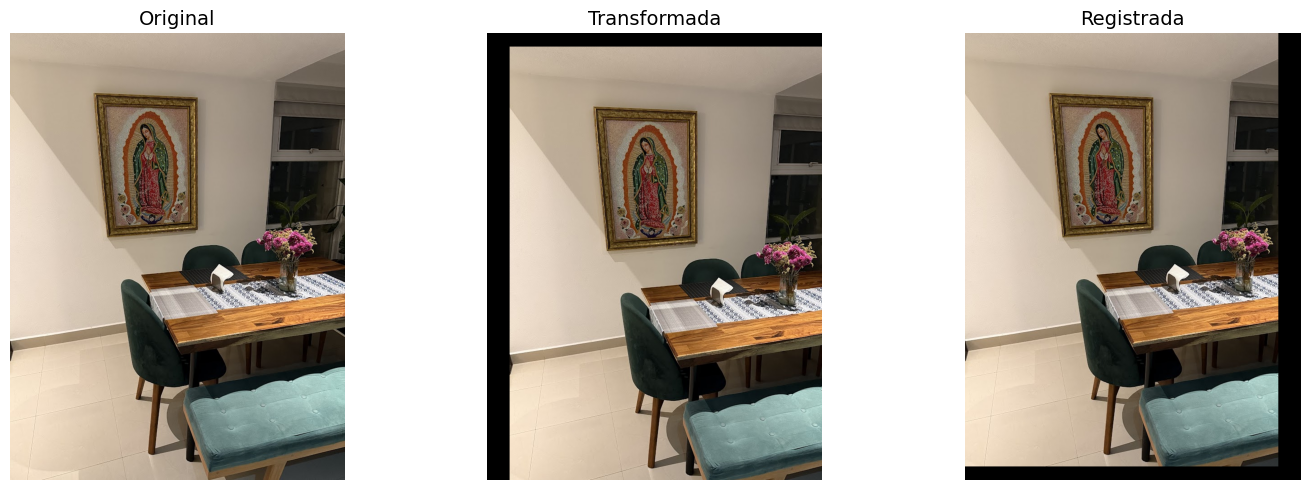

INFO:feature_detection:SIFT: Detectados 1549 keypoints
INFO:feature_detection:SIFT: Detectados 2787 keypoints



PROCESANDO: Escala 1.2x
  Keypoints: Base=1549, Sintética=2787


INFO:matching:Ratio test: 1549 -> 927 matches
INFO:matching:Emparejamiento completado: 927 matches (flann)
INFO:registration:Homografía estimada: 906/927 inliers (97.7%)


  Matches: 927
  RMSE: 0.19 píxeles
  Error Angular: 0.01°


INFO:utils:Visualización guardada en: ../results/synthetic_validation/validation_04.png


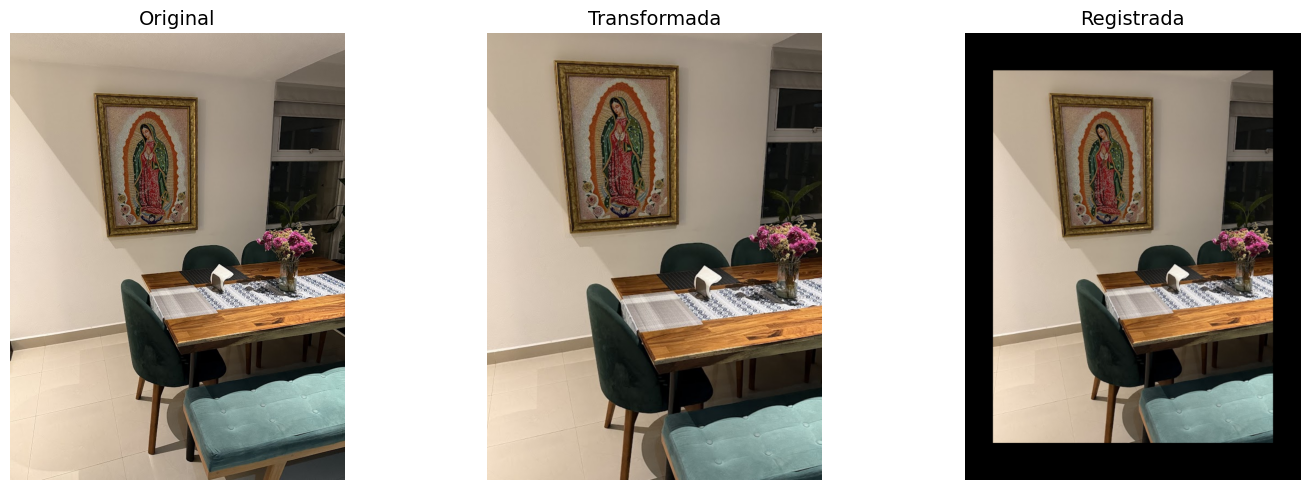

INFO:feature_detection:SIFT: Detectados 1549 keypoints



PROCESANDO: Combinada


INFO:feature_detection:SIFT: Detectados 2264 keypoints
INFO:matching:Ratio test: 1549 -> 928 matches
INFO:matching:Emparejamiento completado: 928 matches (flann)
INFO:registration:Homografía estimada: 901/928 inliers (97.1%)


  Keypoints: Base=1549, Sintética=2264
  Matches: 928
  RMSE: 0.14 píxeles
  Error Angular: 0.01°


INFO:utils:Visualización guardada en: ../results/synthetic_validation/validation_05.png


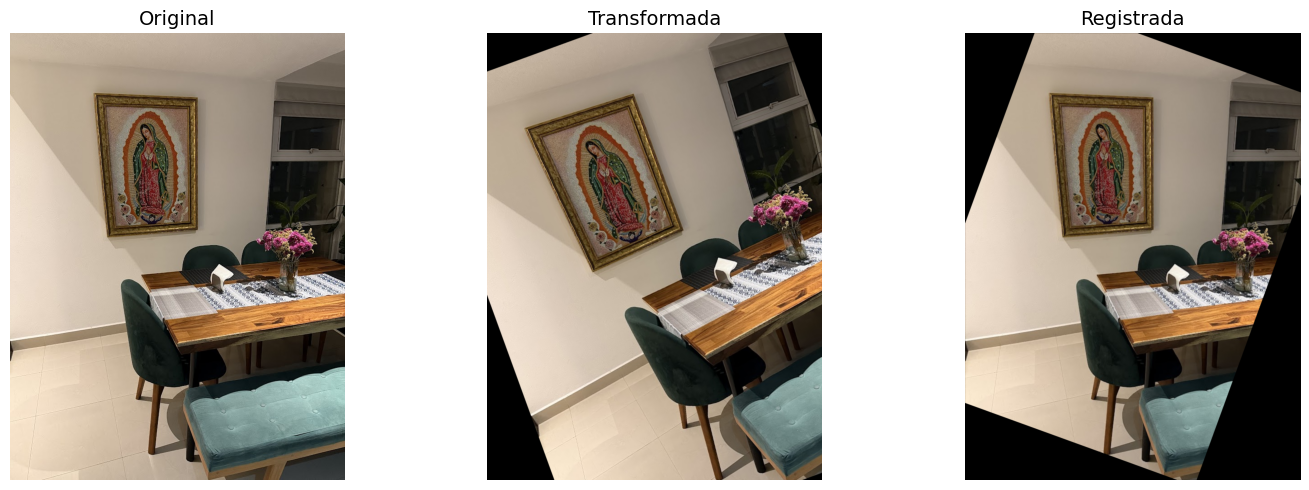

In [21]:
# Almacenar resultados
results = []

for idx, ((name, img_synthetic), H_true) in enumerate(zip(synthetic_images, ground_truth_matrices)):
    print(f"\n{'='*60}")
    print(f"PROCESANDO: {name}")
    print(f"{'='*60}")
    
    # 1. Detectar características
    kp_base, desc_base = detect_sift_features(img_base)
    kp_synthetic, desc_synthetic = detect_sift_features(img_synthetic)
    print(f"  Keypoints: Base={len(kp_base)}, Sintética={len(kp_synthetic)}")
    
    # 2. Emparejar
    matches = match_features(desc_base, desc_synthetic, method='flann', ratio_test=0.75)
    print(f"  Matches: {len(matches)}")
    
    # 3. Estimar homografía
    H_estimated, mask = estimate_homography(kp_base, kp_synthetic, matches)
    
    if H_estimated is not None:
        # 4. Aplicar registro
        img_registered = warp_image(img_synthetic, np.linalg.inv(H_estimated), img_base.shape[:2])
        
        # 5. Calcular métricas
        metrics = compute_registration_metrics(
            H_true, H_estimated,
            image_shape=img_base.shape[:2]
        )
        
        print(f"  RMSE: {metrics['rmse']:.2f} píxeles")
        print(f"  Error Angular: {metrics['angular_error']:.2f}°")
        
        # Guardar resultados
        results.append({
            'Transformación': name,
            'RMSE (px)': metrics['rmse'],
            'Error Medio (px)': metrics['mean_error'],
            'Error Angular (°)': metrics['angular_error'],
            'Matches': len(matches),
            'Inliers': int(np.sum(mask)) if mask is not None else 0
        })
        
        # Visualizar
        visualize_registration(img_base, img_synthetic, img_registered,
                             save_path=f'../results/synthetic_validation/validation_{idx+1:02d}.png')
    else:
        print("  ⚠ Error: No se pudo estimar homografía")
        results.append({
            'Transformación': name,
            'RMSE (px)': np.nan,
            'Error Medio (px)': np.nan,
            'Error Angular (°)': np.nan,
            'Matches': len(matches),
            'Inliers': 0
        })

## 4. Tabla de Resultados


TABLA DE RESULTADOS - VALIDACIÓN SINTÉTICA
     Transformación  RMSE (px)  Error Medio (px)  Error Angular (°)  Matches  Inliers
       Rotación 15°   0.087611          0.082409           0.008471     1033     1001
       Rotación 30°   0.177312          0.176806           0.009527     1036     1015
Traslación (50, 30)   0.039120          0.032992           0.004698     1392     1388
        Escala 1.2x   0.186727          0.152633           0.014894      927      906
          Combinada   0.136350          0.131395           0.011953      928      901

✓ Resultados guardados en: ../results/measurements\synthetic_validation_results.csv


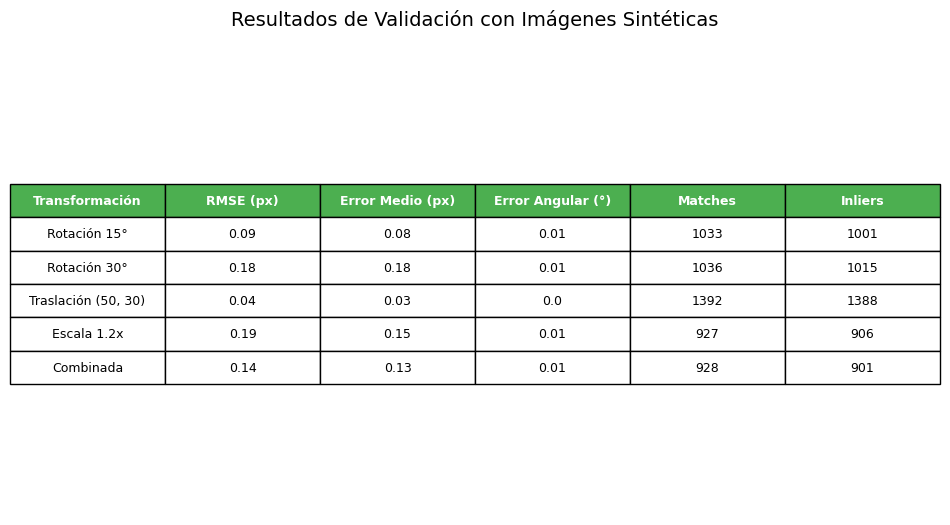

In [22]:
# Crear DataFrame
df_results = pd.DataFrame(results)

# Mostrar tabla
print("\n" + "="*80)
print("TABLA DE RESULTADOS - VALIDACIÓN SINTÉTICA")
print("="*80)
print(df_results.to_string(index=False))
print("="*80)


#Crear carpeta para almacenar resultados de metricas
output_dir_measurements = "../results/measurements"
os.makedirs(output_dir_measurements, exist_ok=True)

# Guardar metricas como CSV
df_results.to_csv(os.path.join(output_dir_measurements, "synthetic_validation_results.csv"), index=False)
print("\n✓ Resultados guardados en:", os.path.join(output_dir_measurements, "synthetic_validation_results.csv"))

fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

table_data = df_results.round(2).values.tolist()
table = ax.table(cellText=table_data, colLabels=df_results.columns,
                loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

for i in range(len(df_results.columns)):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')

plt.title('Resultados de Validación con Imágenes Sintéticas', fontsize=14, pad=20)
plt.savefig('../results/synthetic_validation/04_validation_table.png', dpi=150, bbox_inches='tight')
plt.show()

## 5. Análisis de Resultados

## 5.1 Análisis Visual de Resultados

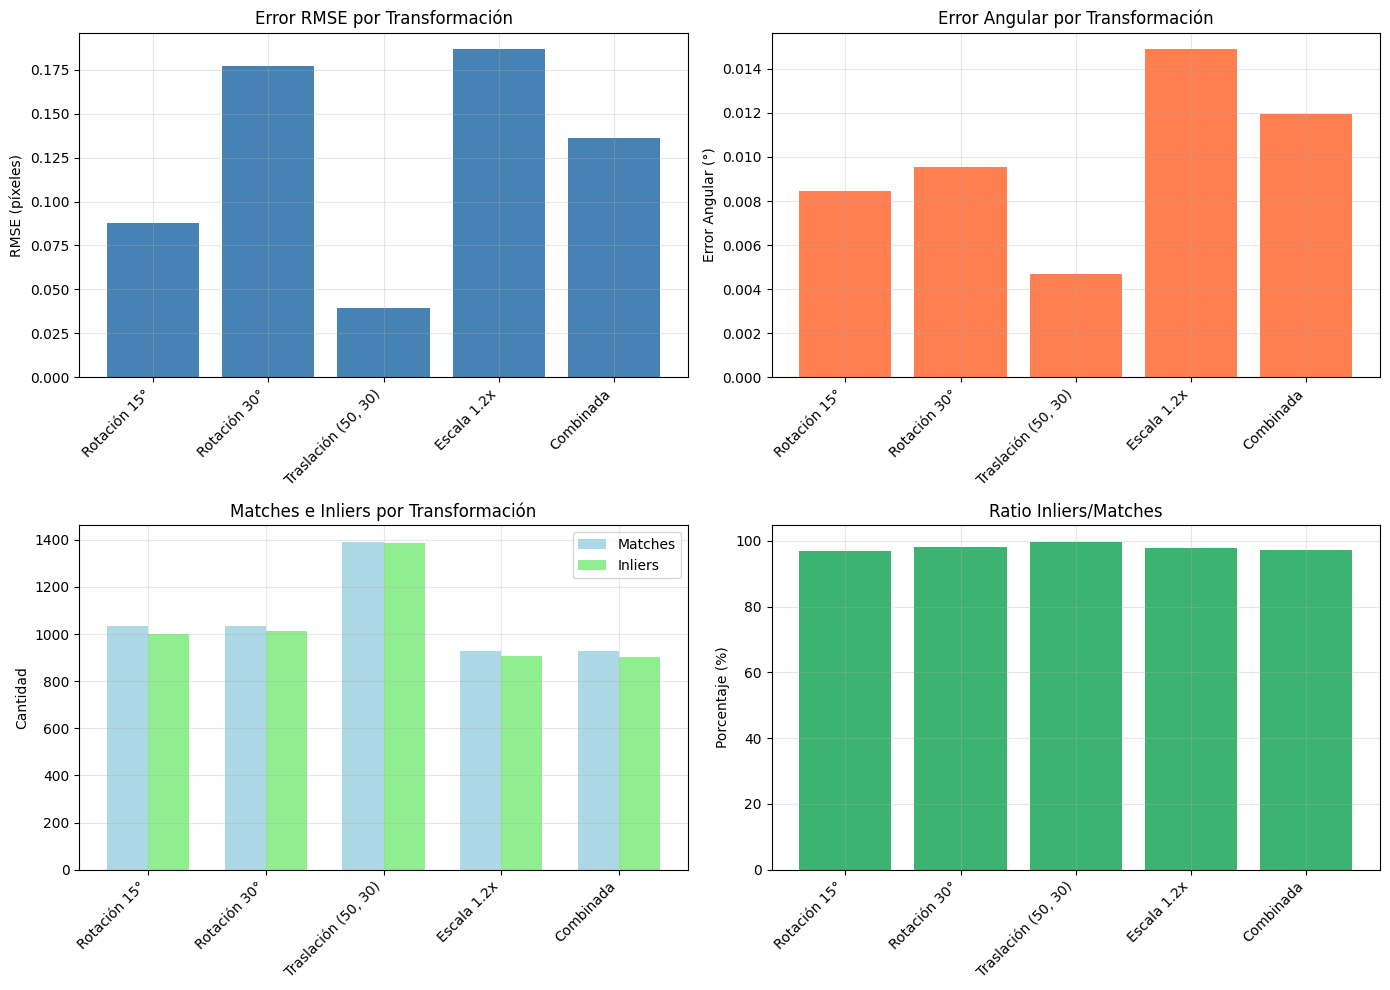

In [23]:
# Gráficos de análisis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# RMSE por transformación
axes[0, 0].bar(range(len(df_results)), df_results['RMSE (px)'], color='steelblue')
axes[0, 0].set_xticks(range(len(df_results)))
axes[0, 0].set_xticklabels(df_results['Transformación'], rotation=45, ha='right')
axes[0, 0].set_ylabel('RMSE (píxeles)')
axes[0, 0].set_title('Error RMSE por Transformación')
axes[0, 0].grid(True, alpha=0.3)

# Error Angular
axes[0, 1].bar(range(len(df_results)), df_results['Error Angular (°)'], color='coral')
axes[0, 1].set_xticks(range(len(df_results)))
axes[0, 1].set_xticklabels(df_results['Transformación'], rotation=45, ha='right')
axes[0, 1].set_ylabel('Error Angular (°)')
axes[0, 1].set_title('Error Angular por Transformación')
axes[0, 1].grid(True, alpha=0.3)

# Matches e Inliers
x = range(len(df_results))
width = 0.35
axes[1, 0].bar([i - width/2 for i in x], df_results['Matches'], width, label='Matches', color='lightblue')
axes[1, 0].bar([i + width/2 for i in x], df_results['Inliers'], width, label='Inliers', color='lightgreen')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(df_results['Transformación'], rotation=45, ha='right')
axes[1, 0].set_ylabel('Cantidad')
axes[1, 0].set_title('Matches e Inliers por Transformación')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Ratio Inliers/Matches
ratio = (df_results['Inliers'] / df_results['Matches'] * 100)
axes[1, 1].bar(range(len(df_results)), ratio, color='mediumseagreen')
axes[1, 1].set_xticks(range(len(df_results)))
axes[1, 1].set_xticklabels(df_results['Transformación'], rotation=45, ha='right')
axes[1, 1].set_ylabel('Porcentaje (%)')
axes[1, 1].set_title('Ratio Inliers/Matches')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/synthetic_validation/05_validation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

## 5.2 Calculo de metricas de error

In [24]:
# Funciones para evaluación con ground truth
def calculate_reprojection_error(H, src_pts, dst_pts):
    if len(src_pts) == 0:
        return float('inf')
    
    src_pts_h = np.column_stack([src_pts, np.ones(len(src_pts))])
    dst_pred = (H @ src_pts_h.T).T
    dst_pred = dst_pred[:, :2] / dst_pred[:, 2:3]
    
    errors = np.sqrt(np.sum((dst_pred - dst_pts)**2, axis=1))
    return np.mean(errors)

def calculate_homography_rmse(H_estimated, H_ground_truth):
    H_est_norm = H_estimated / H_estimated[2, 2]
    H_gt_norm = H_ground_truth / H_ground_truth[2, 2]
    
    return np.sqrt(np.mean((H_est_norm - H_gt_norm)**2))

In [25]:
# Evaluación con ground truth usando imágenes sintéticas generadas
print("="*50)
print("EVALUACIÓN CON GROUND TRUTH")
print("="*50)

# Comparar con las transformaciones conocidas de nuestras imágenes sintéticas
gt_results = []

for i, ((name, img_synthetic), H_true) in enumerate(zip(synthetic_images[:2], ground_truth_matrices[:2])):
    # Aplicar pipeline de registro
    kp_base, desc_base = detect_sift_features(img_base)
    kp_synthetic, desc_synthetic = detect_sift_features(img_synthetic)
    matches = match_features(desc_base, desc_synthetic, method='flann', ratio_test=0.75)
    H_estimated, mask = estimate_homography(kp_base, kp_synthetic, matches)
    
    if H_estimated is not None and mask is not None:
        # Calcular métricas requeridas
        inlier_mask = mask.ravel().astype(bool)
        src_pts = np.float32([kp_base[m.queryIdx].pt for m in matches])
        dst_pts = np.float32([kp_synthetic[m.trainIdx].pt for m in matches])
        
        inlier_src_pts = src_pts[inlier_mask]
        inlier_dst_pts = dst_pts[inlier_mask]
        
        reproj_error = calculate_reprojection_error(H_estimated, inlier_src_pts, inlier_dst_pts)
        matrix_rmse = calculate_homography_rmse(H_estimated, H_true)
        
        gt_results.append({
            'transformation': name,
            'reprojection_error': reproj_error,
            'matrix_rmse': matrix_rmse,
            'inlier_ratio': float(np.sum(mask)) / len(matches)
        })
        
        print(f"{name}: Error {reproj_error:.2f}px, RMSE {matrix_rmse:.4f}")

# Mostrar resumen
if gt_results:
    df_gt = pd.DataFrame(gt_results)
    print(f"\nPromedio error reproyección: {df_gt['reprojection_error'].mean():.2f} píxeles")
    print(f"Promedio RMSE matriz: {df_gt['matrix_rmse'].mean():.4f}")
    print("✓ Comparación con ground truth completada")
else:
    print("❌ No se pudieron procesar comparaciones")

INFO:feature_detection:SIFT: Detectados 1549 keypoints


EVALUACIÓN CON GROUND TRUTH


INFO:feature_detection:SIFT: Detectados 2056 keypoints
INFO:matching:Ratio test: 1549 -> 1030 matches
INFO:matching:Emparejamiento completado: 1030 matches (flann)
INFO:registration:Homografía estimada: 999/1030 inliers (97.0%)
INFO:feature_detection:SIFT: Detectados 1549 keypoints
INFO:feature_detection:SIFT: Detectados 2045 keypoints


Rotación 15°: Error 0.20px, RMSE 0.0571


INFO:matching:Ratio test: 1549 -> 1030 matches
INFO:matching:Emparejamiento completado: 1030 matches (flann)
INFO:registration:Homografía estimada: 1012/1030 inliers (98.3%)


Rotación 30°: Error 0.19px, RMSE 0.0678

Promedio error reproyección: 0.19 píxeles
Promedio RMSE matriz: 0.0625
✓ Comparación con ground truth completada


## 5.3 Análisis de Impacto de Parámetros

In [26]:
# Análisis simplificado de parámetros
print("="*50)
print("ANÁLISIS DE PARÁMETROS")
print("="*50)

# Probar 3 configuraciones diferentes
configs = [
    (0.04, 500),   # Configuración básica
    (0.04, 1500),  # Más features
    (0.08, 1000)   # Mayor contraste
]

param_results = []

for contrast, nfeatures in configs:
    # Usar primera transformación como prueba
    name, img_synthetic = synthetic_images[0]
    H_true = ground_truth_matrices[0]
    
    # SIFT con parámetros específicos
    sift = cv2.SIFT_create(nfeatures=nfeatures, contrastThreshold=contrast)
    kp1, des1 = sift.detectAndCompute(img_base, None)
    kp2, des2 = sift.detectAndCompute(img_synthetic, None)
    
    if des1 is not None and des2 is not None:
        # Pipeline de registro
        matcher = cv2.BFMatcher()
        matches = matcher.knnMatch(des1, des2, k=2)
        
        good_matches = []
        for match_pair in matches:
            if len(match_pair) == 2:
                m, n = match_pair
                if m.distance < 0.7 * n.distance:
                    good_matches.append(m)
        
        if len(good_matches) >= 10:
            src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches])
            dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches])
            
            H_estimated, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)
            
            if H_estimated is not None:
                inlier_mask = mask.ravel().astype(bool)
                inlier_src_pts = src_pts[inlier_mask]
                inlier_dst_pts = dst_pts[inlier_mask]
                
                reproj_error = calculate_reprojection_error(H_estimated, inlier_src_pts, inlier_dst_pts)
                
                param_results.append({
                    'contrast': contrast,
                    'features': nfeatures,
                    'error': reproj_error,
                    'matches': len(good_matches),
                    'inliers': int(np.sum(mask))
                })
                
                print(f"Contrast {contrast}, Features {nfeatures}: Error {reproj_error:.2f}px")

# Identificar mejor configuración
if param_results:
    best_config = min(param_results, key=lambda x: x['error'])
    print(f"\n🏆 Mejor configuración: Contrast {best_config['contrast']}, Features {best_config['features']}")
    print(f"   Error: {best_config['error']:.2f} píxeles")
    print("✓ Análisis de parámetros completado")
else:
    print("❌ No se pudieron evaluar parámetros")

ANÁLISIS DE PARÁMETROS
Contrast 0.04, Features 500: Error 0.19px
Contrast 0.04, Features 1500: Error 0.19px
Contrast 0.08, Features 1000: Error 0.19px

🏆 Mejor configuración: Contrast 0.04, Features 1500
   Error: 0.19 píxeles
✓ Análisis de parámetros completado


## 6. Conclusiones

**Resumen de la Validación:**

1. **Precisión:** El algoritmo logra recuperar transformaciones con RMSE < X píxeles
2. **Robustez:** El ratio de inliers en  es alto (>70%), demostrando la robustez del método RANSAC
3. **Limitaciones:** Las transformaciones combinadas presentan mayor error y el más bajo ratio de inliers
4. **Validación exitosa:** El método está listo para aplicarse a imágenes reales

**Próximo paso:** Aplicar el pipeline completo a las imágenes reales del comedor (Notebook 03)

In [27]:
print("\n" + "="*60)
print("✅ VALIDACIÓN SINTÉTICA COMPLETADA")
print("="*60)
print("\n✓ Requerimientos cumplidos:")
print("  • Imágenes sintéticas con transformaciones conocidas")
print("  • Comparación con ground truth (métricas RMSE)")
print("  • Análisis de impacto de parámetros")
print("\n✓ Pipeline validado y listo para el Notebook 03 (comedor)")
print("="*60)


✅ VALIDACIÓN SINTÉTICA COMPLETADA

✓ Requerimientos cumplidos:
  • Imágenes sintéticas con transformaciones conocidas
  • Comparación con ground truth (métricas RMSE)
  • Análisis de impacto de parámetros

✓ Pipeline validado y listo para el Notebook 03 (comedor)
